### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore
from sklearn.decomposition import PCA

In [3]:
# Load the dataset  
data = pd.read_csv('Desktop/Pro assignment/dataset.csv')

### Information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Displays first 10 rows of data 

In [7]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### Displays last 10 rows of dataset

In [9]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,unknown


### Displays the total no of rows and columns

In [11]:
data.shape

(344, 7)

### Displays all the columns names present in the dataset

In [13]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## 1)Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it.

### Displays the null values count Presents in data set

In [16]:
data.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

##### Fill missing numerical values with the mean for numercial data and mode for categorical data

In [18]:
data['bill_length_mm'] = data['bill_length_mm'].fillna(data['bill_length_mm'].mean())
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean())
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean())
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].mean())
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [19]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.876855,17.15117,200.915205,4273.976608,male
4,Adelie,Torgersen,36.700000,19.30000,193.000000,3450.000000,female
5,Adelie,Torgersen,39.300000,20.60000,190.000000,3650.000000,male
6,Adelie,Torgersen,38.900000,17.80000,181.000000,3625.000000,female
7,Adelie,Torgersen,39.200000,19.60000,195.000000,4675.000000,male
8,Adelie,Torgersen,34.100000,18.10000,193.000000,3475.000000,male
9,Adelie,Torgersen,42.000000,20.20000,190.000000,4250.000000,male


## 2)What is the average body_mass_g for Gentoo penguins? (code)

In [22]:
gentoo_avg_body_mass = data[data['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body_mass_g for Gentoo penguins: {gentoo_avg_body_mass}")


Average body_mass_g for Gentoo penguins: 5126.806262969251


## 3)How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.

In [24]:
from scipy.stats import skew, kurtosis

# Group by species and calculate skewness and kurtosis
distribution_analysis = {}
for species in data['species'].unique():
    species_data = data[data['species'] == species]
    distribution_analysis[species] = {
        'bill_length_mm': {
            'skewness': skew(species_data['bill_length_mm']),
            'kurtosis': kurtosis(species_data['bill_length_mm'])
        },
        'bill_depth_mm': {
            'skewness': skew(species_data['bill_depth_mm']),
            'kurtosis': kurtosis(species_data['bill_depth_mm'])
        }
    }

# Print the results
print("Distribution Analysis (Skewness and Kurtosis):")
for species, stats in distribution_analysis.items():
    print(f"\nSpecies: {species}")
    for feature, metrics in stats.items():
        print(f"  {feature}: Skewness = {metrics['skewness']:.2f}, Kurtosis = {metrics['kurtosis']:.2f}")


Distribution Analysis (Skewness and Kurtosis):

Species: Adelie
  bill_length_mm: Skewness = 0.16, Kurtosis = -0.23
  bill_depth_mm: Skewness = 0.33, Kurtosis = -0.10

Species: Gentoo
  bill_length_mm: Skewness = 0.71, Kurtosis = 1.15
  bill_depth_mm: Skewness = 0.33, Kurtosis = -0.61

Species: Chinstrap
  bill_length_mm: Skewness = -0.10, Kurtosis = -0.12
  bill_depth_mm: Skewness = 0.01, Kurtosis = -0.90


##### Skewness:

Measures the asymmetry of a distribution.

Positive skewness: The right tail is longer (values concentrated to the left).

Negative skewness: The left tail is longer (values concentrated to the right).

##### Kurtosis:

Measures the tailedness or peak sharpness of a distribution.

Kurtosis ~3: Normal distribution (mesokurtic).

Kurtosis > 3: Heavy tails, extreme values are more common (leptokurtic).

Kurtosis < 3: Light tails, extreme values are less common (platykurtic).

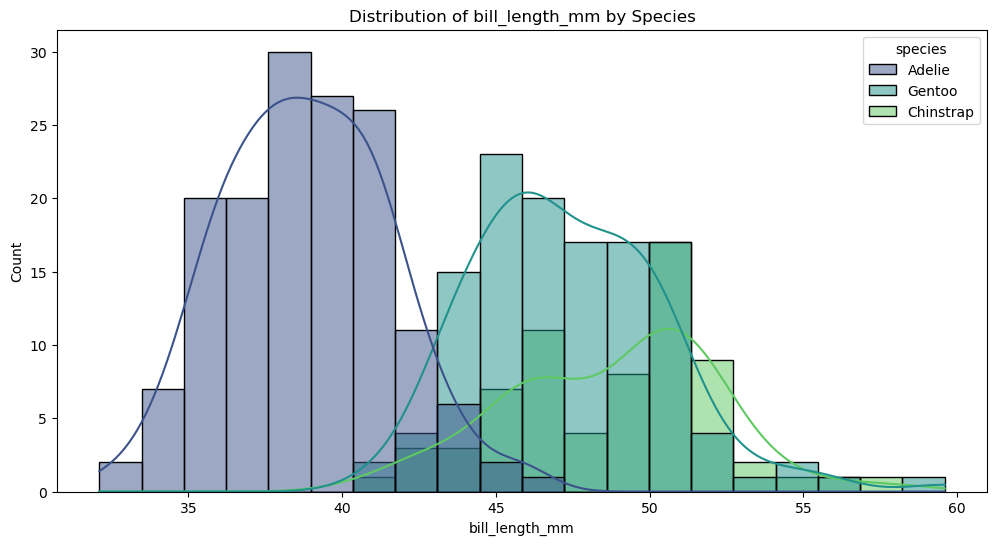

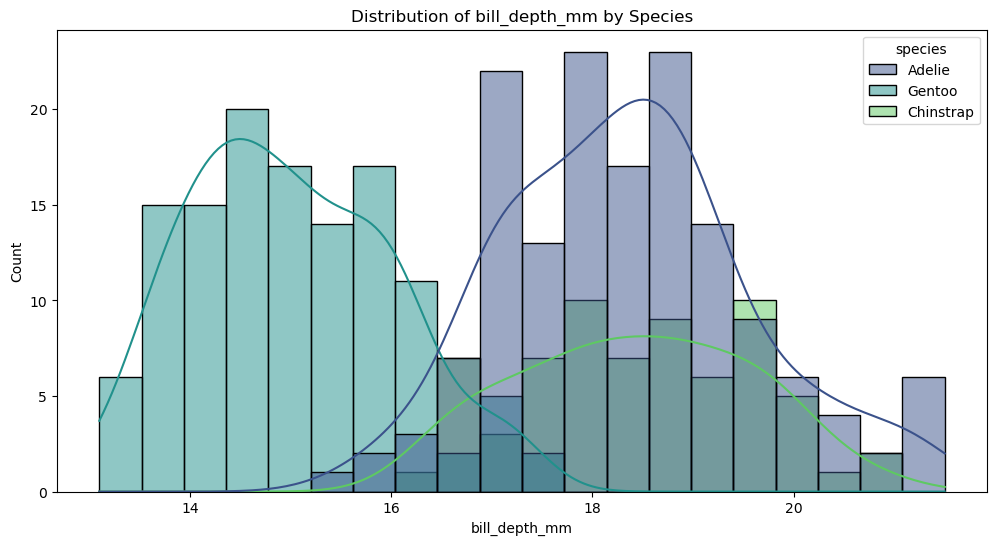

In [26]:
# Plotting distributions for each species
import seaborn as sns
import matplotlib.pyplot as plt

features = ['bill_length_mm', 'bill_depth_mm']

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data, x=feature, hue='species', kde=True, palette="viridis", bins=20)
    plt.title(f"Distribution of {feature} by Species")
    plt.show()


### 4)Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

In [28]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Dictionary to store outliers for each column
outliers = {}

# Loop through each column to find outliers
for col in cols:
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Identify outliers
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Print the outliers for the current column
    print(f"Outliers in {col}:")
    print(outliers[col])

Outliers in bill_length_mm:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in bill_depth_mm:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in flipper_length_mm:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in body_mass_g:
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


##### IQR Calculation:
Q1 (1st Quartile): The 25th percentile of the data.

Q3 (3rd Quartile): The 75th percentile of the data.

IQR (Interquartile Range): Q3 - Q1, representing the middle 50% of the data.
##### Outlier Boundaries:
Lower Bound: Q1 - 1.5 * IQR

Upper Bound: Q3 + 1.5 * IQR 

-Any data point falling outside these bounds is considered an outlier.

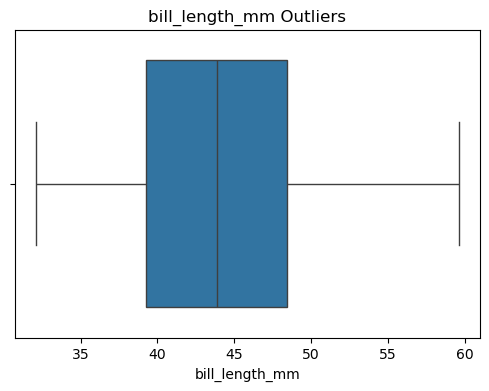

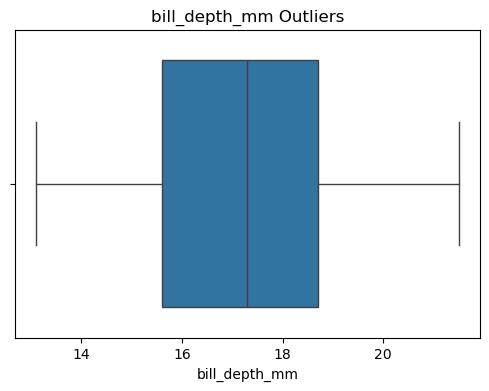

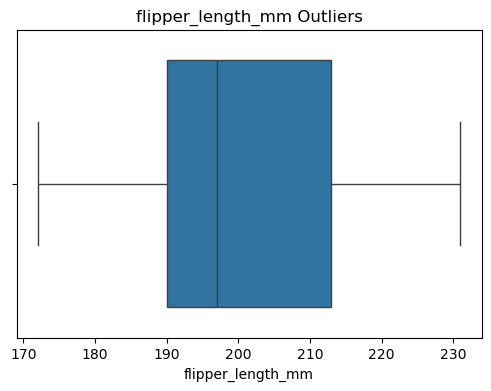

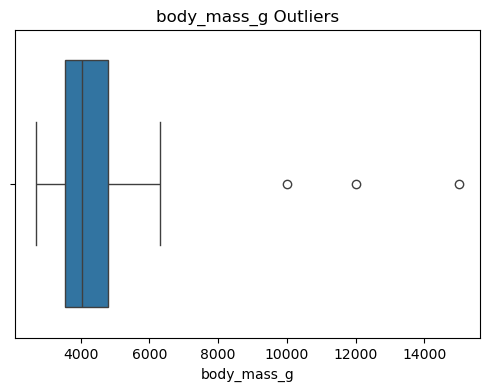

In [30]:

cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Loop through each column and plot its boxplot
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'{col} Outliers')
    plt.xlabel(col)
    plt.show()


## 5)Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

curse of dimensionality refers to the phenomenon where as the number of features increases, the data becomes sparse, and the performance of machine learning models can degrade due to the increased complexity.

In [70]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
print(f"PCA Result:\n{pca_result[:5]}")


PCA Result:
[[-5.24126106e+02 -1.62753250e+01  4.79884575e-01 -1.65244779e-01]
 [-4.74087155e+02 -1.16510572e+01 -5.10989662e-01 -9.31878884e-01]
 [-1.02399739e+03  1.65057021e+00 -1.67851811e+00  6.27980492e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.24028445e+02 -2.91309364e+00 -4.54031268e+00  2.06075986e+00]]


PCA requires data to be standardized because it is sensitive to the scale of the features.

Features with larger ranges can dominate the principal components.

## 6)Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them

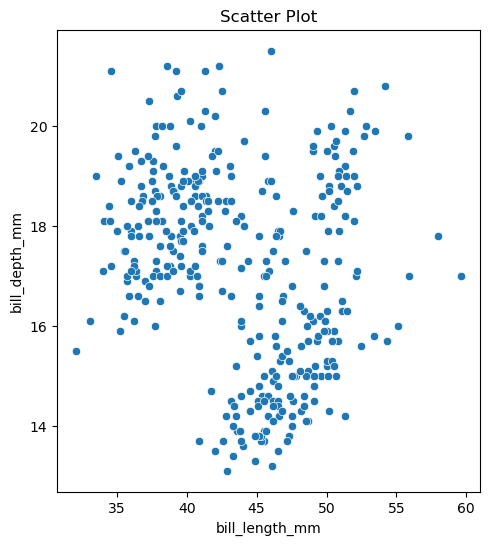

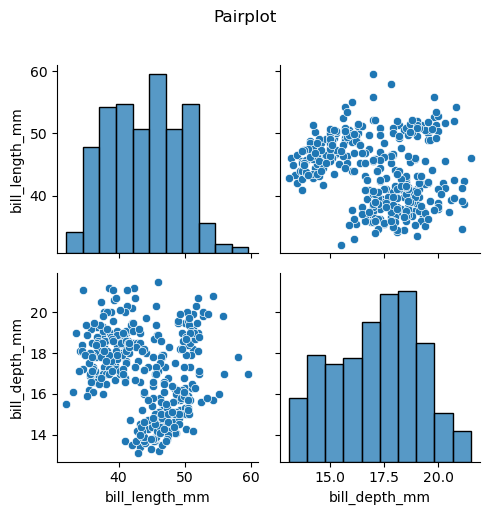

In [35]:
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=data)
plt.title('Scatter Plot')

# Pairplot
sns.pairplot(data[['bill_length_mm', 'bill_depth_mm']])
plt.suptitle('Pairplot', y=1.02)  # Adjust the title to avoid overlap

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'KDE Plot')

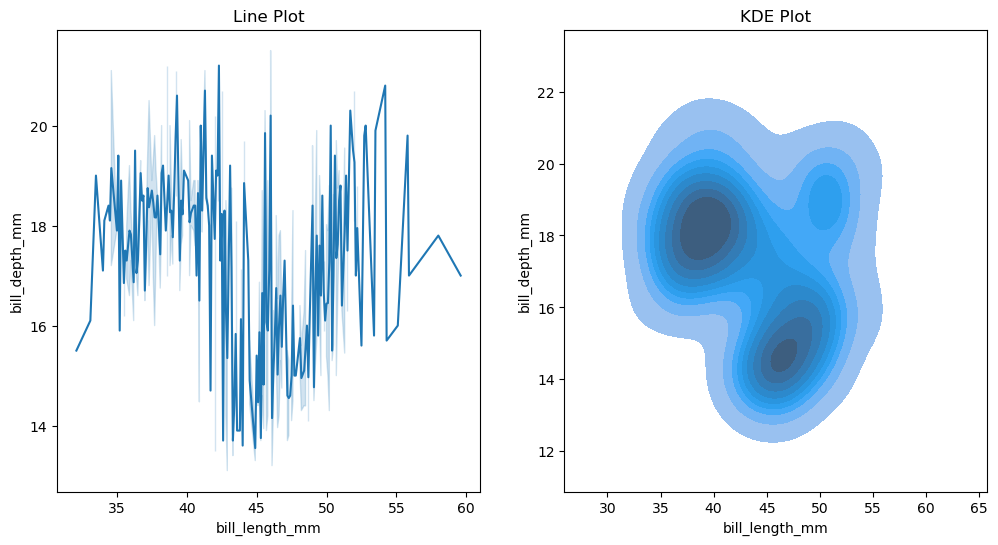

In [36]:
# Line plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', data=data)
plt.title('Line Plot')


# KDE plot
plt.subplot(1, 2, 2)
# Pass data as a DataFrame and specify columns for x and y
sns.kdeplot(data=data, x='bill_length_mm', y='bill_depth_mm', fill=True)  
plt.title('KDE Plot')


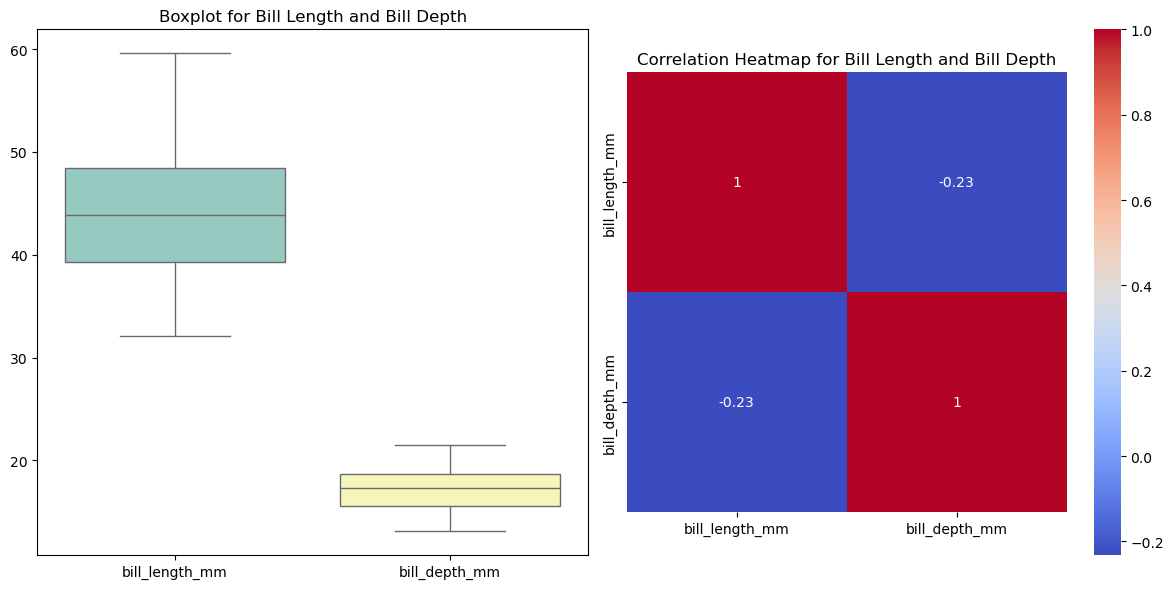

In [37]:
# Boxplot for bill_length_mm and bill_depth_mm
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Adjusted for two plots side-by-side
sns.boxplot(data=data[['bill_length_mm', 'bill_depth_mm']], palette="Set3")
plt.title('Boxplot for Bill Length and Bill Depth')

# Heatmap for correlation
plt.subplot(1, 2, 2)
sns.heatmap(data[['bill_length_mm', 'bill_depth_mm']].corr(), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for Bill Length and Bill Depth')

# Adjust layout to make it neat
plt.tight_layout()
plt.show()


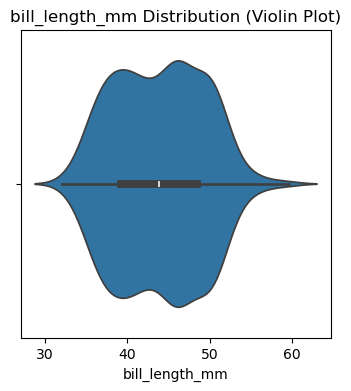

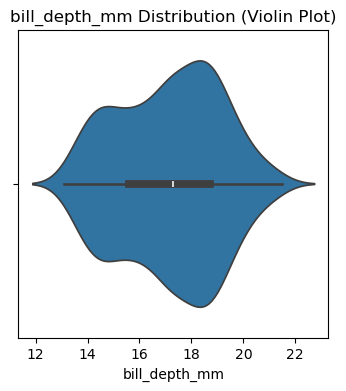

In [38]:
# List of numerical columns to plot
a = ['bill_length_mm', 'bill_depth_mm']

# Loop through each column and plot its violin plot
for col in a:
    plt.figure(figsize=(4, 4))
    sns.violinplot(x=data[col])
    plt.title(f'{col} Distribution (Violin Plot)')
    plt.xlabel(col)
    plt.show()


## 7)Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [40]:
max_flippers = data.groupby(['species', 'island'])['flipper_length_mm'].max()
print("Maximum Flipper Length (mm) by Species and Island:")
print(max_flippers)


Maximum Flipper Length (mm) by Species and Island:
species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [41]:
# Which species has the longest flippers 
longest_flippers = max_flippers.reset_index().sort_values(by='flipper_length_mm', ascending=False).drop_duplicates(['island'])
print("Species with the longest flippers on each island:")
print(longest_flippers)

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


### 8)Perform z-score normalization on this dataset

In [43]:
data_normalized = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].apply(zscore)
print("Z-score Normalized Data:")
print(data_normalized.head())

Z-score Normalized Data:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.882230       0.787743          -1.422488    -0.470213
1       -0.808355       0.126556          -1.065352    -0.425343
2       -0.660604       0.431719          -0.422507    -0.918910
3        0.000000       0.000000           0.000000     0.000000
4       -1.325483       1.092905          -0.565361    -0.739431


###### Z-score normalization (also known as standardization) is a method of scaling data such that it has a mean of 0 and a standard deviation of 1